# SalesLoft

Merupakan soal data analyst yang berasal dari https://github.com/SalesLoft/data-analyst-exercise.

Soal

1. Integritas dan Pembersihan Data

Mengurutkan secara alfabet semua data pada kolom "country_code" yang muncul lebih dari satu kali pada tabel "continent_map". Untuk negara yang tidak memiliki "country_code" ditampilkan sebagai "N/A" dan tampilkan terlebih dahulu dalam daftar.

Jawaban

Data "continent_map"

In [13]:
import pandas as pd
file_continent_map = pd.read_csv('continent_map.csv')
file_continent_map

,country_code,continent_code
0,ABW,NaN
1,AFG,AS
2,AGO,AF
3,AIA,NaN
4,ALA,EU
...,...,...
258,WSM,OC
259,YEM,AS
260,ZAF,AF
261,ZMB,AF


Data hasil Integritas dan Pembersihan

In [14]:
data_continent_map = file_continent_map['country_code'].value_counts(dropna=False)
dataframe = pd.DataFrame(list(zip(data_continent_map.index,data_continent_map)),columns=['country_code','appear'])
dataframe

,country_code,appear
0,NaN,4
1,ARM,3
2,CYP,2
3,UMI,2
4,AZE,2
...,...,...
246,GRC,1
247,GRD,1
248,GRL,1
249,GTM,1


Soal

2. Buat 10 daftar negara dengan persentase pertumbuhan GDP tertinggi antara tahun 2011 dan 2012

Persentase pertumbuhan didefinisikan sebagai (GDP Per Kapita tahun 2012 - GDP Per Kapita tahun 2011) / (GDP Per Kapita tahun 2011)

Data yang ditampilkan harus memuat:
- Rank
- Country Name
- Country Code
- Continent
- Growth Percent

Jawaban

Data "per_capita"

In [15]:
import numpy as np
file_per_capita = pd.read_csv('per_capita.csv')
file_per_capita

,country_code,year,gdp_per_capita
0,ABW,2004,22566.682160
1,AND,2004,29372.166740
2,AFG,2004,220.056288
3,AGO,2004,1229.342988
4,ALB,2004,2320.892330
...,...,...,...
2074,YEM,2012,1498.261568
2075,ZAF,2012,7351.756648
2076,COD,2012,261.836335
2077,ZMB,2012,1462.887261


Data "countries"

In [16]:
file_countries = pd.read_csv('countries.csv')
file_countries

,country_code,country_name
0,ABW,Aruba
1,AND,Andorra
2,AFG,Afghanistan
3,AGO,Angola
4,ALB,Albania
...,...,...
247,YEM,"Yemen, Rep."
248,ZAF,South Africa
249,COD,"Congo, Dem. Rep."
250,ZMB,Zambia


Data "continent_map"

In [17]:
file_continent_map = pd.read_csv('continent_map.csv')
file_continent_map

,country_code,continent_code
0,ABW,NaN
1,AFG,AS
2,AGO,AF
3,AIA,NaN
4,ALA,EU
...,...,...
258,WSM,OC
259,YEM,AS
260,ZAF,AF
261,ZMB,AF


In [18]:
file_per_capita['gdp_per_capita'] = file_per_capita['gdp_per_capita'].fillna(0)
file_continent_map['continent_code'] = file_continent_map['continent_code'].replace(np.nan, 'NA')

per_capita2011 = file_per_capita[file_per_capita.year==2011]
per_capita2012 = file_per_capita[file_per_capita.year==2012]

temp_country_per_capita = []
temp_GDP_2011_2012 = []
for x in range(len(per_capita2011)):
    loc_gdp_2011 = per_capita2011.iloc[x,2]
    loc_gdp_2012 = per_capita2012.iloc[x,2]
    loc_country_per_capita = file_per_capita.iloc[x,0]
    if loc_gdp_2011==0 or loc_gdp_2012==0:
        GDP_2011_2012 = 0
    else:
        GDP_2011_2012 = (loc_gdp_2012 - loc_gdp_2011)/loc_gdp_2011
    temp_country_per_capita.append(loc_country_per_capita)    
    temp_GDP_2011_2012.append(GDP_2011_2012)
    
dictionary_countries = dict(zip(file_countries['country_code'],file_countries['country_name']))
temp_country_name=[]
for item in temp_country_per_capita:
    check = dictionary_countries.get(item)
    if (check):
        temp_country_name.append(check)
    else:
        check='Unknown'
        temp_country_name.append(check)
    
dictionary_continent = dict(zip(file_continent_map['country_code'],file_continent_map['continent_code']))
temp_continent_code=[]
for item in temp_country_per_capita:
    check = dictionary_continent.get(item)
    if (check):
        temp_continent_code.append(check)
    else:
        cek='Unknown'
        temp_continent_code.append(check)
        
print('10 Negara dengan persentase pertumbuhan perkapita tertinggi antara tahun 2011 dan 2012')
    
GDP_2011_2012 = pd.DataFrame(list(zip(temp_country_name,temp_country_per_capita,temp_continent_code,temp_GDP_2011_2012)),columns=['country_name','country_code','continent_code','Growth Percent']) 
GDP_2011_2012['continent_code'] = GDP_2011_2012['continent_code'].replace(np.nan, 'NA')
GDP_2011_2012.sort_values(by=['Growth Percent'],ascending=False).head(10)

10 Negara dengan persentase pertumbuhan perkapita tertinggi antara tahun 2011 dan 2012


,country_name,country_code,continent_code,Growth Percent
64,Ethiopia,ETH,AF,0.358752
185,Sierra Leone,SLE,AF,0.267252
213,Uganda,UGA,AF,0.250350
169,Papua New Guinea,PNG,OC,0.235919
205,Turkmenistan,TKM,AS,0.187472
220,"Venezuela, RB",VEN,SA,0.186498
104,Kenya,KEN,AF,0.178233
129,"Macao SAR, China",MAC,AS,0.162051
144,Mongolia,MNG,AS,0.154620
212,Tanzania,TZA,AF,0.147666


Soal

3. Untuk tahun 2012, bandingkan persentase GDB per capita untuk wilayah: Amerika Utara (NA), Eropa (UE), dan Seluruh Dunia

Jawaban

In [19]:
dataframe_per_capita2012 = pd.DataFrame(per_capita2012)
dataframe_per_capita2012['continent_code'] = temp_continent_code

GDP_NA = per_capita2012[per_capita2012.continent_code=='AS']
GDP_EU = per_capita2012[per_capita2012.continent_code=='EU']
GDP_Other = per_capita2012[(per_capita2012.continent_code!='EU') & (per_capita2012.continent_code!='NA')]

sum_GDP_NA = GDP_NA['gdp_per_capita'].sum()
sum_GDP_EU = GDP_EU['gdp_per_capita'].sum()
sum_GDP_Other = GDP_Other['gdp_per_capita'].sum()

percentage_GDP_NA = sum_GDP_NA/(sum_GDP_NA+sum_GDP_EU+sum_GDP_Other)*100
percentage_GDP_EU = sum_GDP_EU/(sum_GDP_NA+sum_GDP_EU+sum_GDP_Other)*100
percentage_GDP_Other = sum_GDP_Other/(sum_GDP_NA+sum_GDP_EU+sum_GDP_Other)*100

list_sum = [[percentage_GDP_NA,percentage_GDP_EU,percentage_GDP_Other]]

compare_GDP_2012_dataframe = pd.DataFrame(list_sum,columns=['Nort America','Europe','Other'])
compare_GDP_2012_dataframe

,Nort America,Europe,Other
0,21.870093,32.606718,45.523189


Soal

4. Untuk tahun 2004 hingga 2012, hitung rata - rata GDP per capita setiap benua tiap tahun. Rata - rata dihitung dengan rumus: Jumlah GDP per kapita untuk semua negara di benua / jumlah negara di benua.

Data yang ditampilkan harus memuat:
- Year
- Continent
- Average GDP Per Capita

Jawaban

In [20]:
import matplotlib.pyplot as plt
from mplcursors import cursor
year_per_capita = file_per_capita['year'].tolist()
year_per_capita_eliminated_dupe = [*set(year_per_capita)]

file_continens = pd.read_csv('continents.csv')
file_continens['continent_code'] = file_continens['continent_code'].replace(np.nan, 'NA')
file_continens_continent_code = file_continens['continent_code']
file_continens_continent_name = file_continens['continent_name']

average_year = []
average_continent = []
average_gdp = []
temp_median = []
for x in range(len(year_per_capita_eliminated_dupe)):
    year_select = year_per_capita_eliminated_dupe[x]
    GDP_year = file_per_capita[file_per_capita.year==year_select]
    GDP_year_dataframe = pd.DataFrame(GDP_year)
    GDP_year_dataframe['continent_code'] = temp_continent_code

    for y in range(len(file_continens_continent_code)):
        continent_code_select = file_continens_continent_code[y]
        continent_name_select = file_continens_continent_name[y]
        GDP = GDP_year_dataframe[GDP_year_dataframe.continent_code==continent_code_select]
        
        len_data = len(GDP)
   
        copy_GDP = GDP.copy()
        copy_GDP_dataframe = pd.DataFrame(copy_GDP)
        copy_GDP_dataframe_sort=copy_GDP_dataframe.sort_values(by=['gdp_per_capita'],ascending=False)
        
        gdp_median = copy_GDP_dataframe_sort['gdp_per_capita'].tolist()
        
        if len_data == 0:
            median = 0
        elif len_data % 2 == 0:
            higher = gdp_median[len_data//2]   
            lower = gdp_median[len_data//2 - 1]
            median = (higher + lower)/2
        else:
            median = gdp_median[len_data//2]
        temp_median.append(median)
        
        average = GDP['gdp_per_capita'].sum()
        if average == 0:
            average_GDP = 0
        else:
            average_GDP = average/len(GDP) 
        average_gdp.append(average_GDP)
        average_continent.append(continent_name_select)
        average_year.append(year_select)

average_GDP_2004_2011 = pd.DataFrame(list(zip(average_year,average_continent,average_gdp)),columns=['Year','Continent','Average GDP Per Capita'])
average_GDP_2004_2011

,Year,Continent,Average GDP Per Capita
0,2004,Africa,1496.554811
1,2004,Asia,8133.684269
2,2004,Europe,27050.346386
3,2004,North America,12576.254051
4,2004,South America,3051.490230
...,...,...,...
58,2012,Europe,25132.641877
59,2012,North America,13909.474908
60,2012,South America,8759.512257
61,2012,Oceania,11482.503868


Soal

5. Untuk tahun 2004 hingga 2012, hitung median GDP per kapita untuk setiap benua tiap tahun. Median dalam hal ini didefinisikan sebagai: Nilai di mana setengah sampel benua lebih tinggi dan setengahnya lebih rendah.

Jawaban

In [21]:
dataframe_median = pd.DataFrame(list(zip(average_year,average_continent,temp_median)),columns=['Year','Continent','Median GDP Per Capita'])
dataframe_median.drop(dataframe_median[dataframe_median['Median GDP Per Capita'] == 0].index, inplace = True)
dataframe_median

,Year,Continent,Median GDP Per Capita
0,2004,Africa,534.257001
1,2004,Asia,1473.158053
2,2004,Europe,22472.343285
3,2004,North America,5250.552921
4,2004,South America,2880.419623
5,2004,Oceania,2247.837771
7,2005,Africa,653.991415
8,2005,Asia,1777.912550
9,2005,Europe,23762.445325
10,2005,North America,5492.864914


Visualisasi

Soal nomor 3

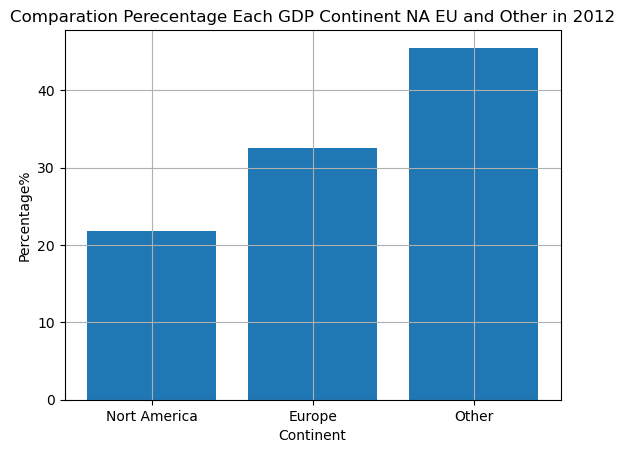

In [22]:
nort_america = compare_GDP_2012_dataframe['Nort America']
europe = compare_GDP_2012_dataframe.iloc[0,1]
other = compare_GDP_2012_dataframe.iloc[0,2]

plt.bar(compare_GDP_2012_dataframe.columns,[percentage_GDP_NA,percentage_GDP_EU,percentage_GDP_Other])

plt.xlabel("Continent")
plt.ylabel("Percentage%")
plt.title("Comparation Perecentage Each GDP Continent NA EU and Other in 2012")

plt.grid()
plt.show()

Soal nomor 4

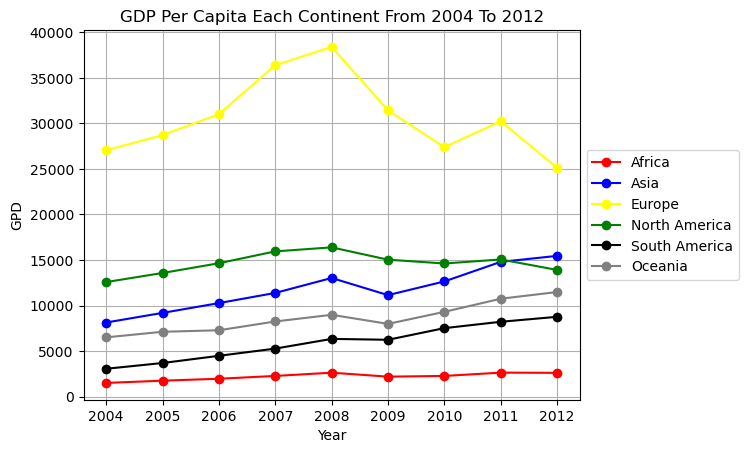

In [23]:
africa=average_GDP_2004_2011[average_GDP_2004_2011.Continent=='Africa']
asia=average_GDP_2004_2011[average_GDP_2004_2011.Continent=='Asia']
europe=average_GDP_2004_2011[average_GDP_2004_2011.Continent=='Europe']
north_america=average_GDP_2004_2011[average_GDP_2004_2011.Continent=='North America']
south_america=average_GDP_2004_2011[average_GDP_2004_2011.Continent=='South America']
oceania=average_GDP_2004_2011[average_GDP_2004_2011.Continent=='Oceania']

plt.plot(year_per_capita_eliminated_dupe,africa['Average GDP Per Capita'],label ='Africa',marker='o',color='red')
plt.plot(year_per_capita_eliminated_dupe,asia['Average GDP Per Capita'],label ='Asia',marker='o',color='blue')
plt.plot(year_per_capita_eliminated_dupe,europe['Average GDP Per Capita'],label ='Europe',marker='o',color='yellow')
plt.plot(year_per_capita_eliminated_dupe,north_america['Average GDP Per Capita'],label ='North America',marker='o',color='green')
plt.plot(year_per_capita_eliminated_dupe,south_america['Average GDP Per Capita'],label ='South America',marker='o',color='black')
plt.plot(year_per_capita_eliminated_dupe,oceania['Average GDP Per Capita'],label ='Oceania',marker='o',color='grey')

plt.legend(loc='center left',bbox_to_anchor =(1, 0.5), ncol = 1)

plt.xlabel("Year")
plt.ylabel("GPD")
plt.title("GDP Per Capita Each Continent From 2004 To 2012")

plt.grid()
plt.show()

Soal nomor 5

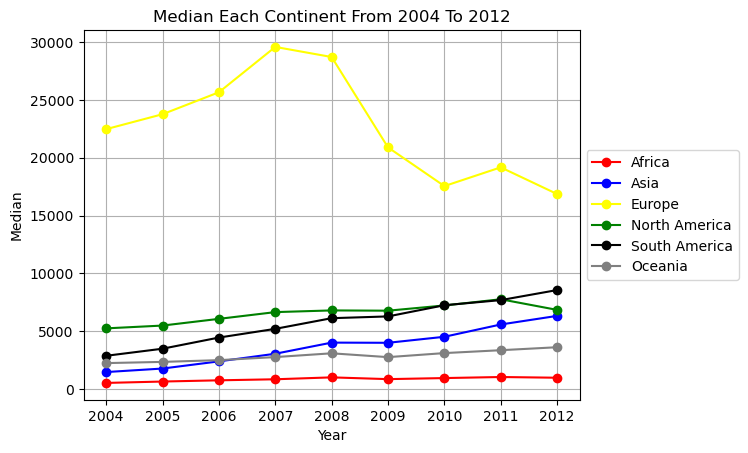

In [24]:
africa=dataframe_median[dataframe_median.Continent=='Africa']
asia=dataframe_median[dataframe_median.Continent=='Asia']
europe=dataframe_median[dataframe_median.Continent=='Europe']
north_america=dataframe_median[dataframe_median.Continent=='North America']
south_america=dataframe_median[dataframe_median.Continent=='South America']
oceania=dataframe_median[dataframe_median.Continent=='Oceania']

plt.plot(year_per_capita_eliminated_dupe,africa['Median GDP Per Capita'],label ='Africa',marker='o',color='red')
plt.plot(year_per_capita_eliminated_dupe,asia['Median GDP Per Capita'],label ='Asia',marker='o',color='blue')
plt.plot(year_per_capita_eliminated_dupe,europe['Median GDP Per Capita'],label ='Europe',marker='o',color='yellow')
plt.plot(year_per_capita_eliminated_dupe,north_america['Median GDP Per Capita'],label ='North America',marker='o',color='green')
plt.plot(year_per_capita_eliminated_dupe,south_america['Median GDP Per Capita'],label ='South America',marker='o',color='black')
plt.plot(year_per_capita_eliminated_dupe,oceania['Median GDP Per Capita'],label ='Oceania',marker='o',color='grey')

plt.legend(loc='center left',bbox_to_anchor =(1, 0.5), ncol = 1)

plt.xlabel("Year")
plt.ylabel("Median")
plt.title('Median Each Continent From 2004 To 2012')

plt.grid()
plt.show()